In [94]:
#imports
import pybaseball
from pybaseball import statcast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#vizi settings
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize']= [10,5]
plt.rcParams['font.family'] = 'serif'
plt.style.use('dark_background')
pybaseball.cache.enable()
%matplotlib inline

In [95]:
#import data from Projects/Data folder
playerIds = pd.read_csv('Data/mlbPlayerIdMap2.csv')

In [96]:
#import data from statcast in 2023 no spring training data
df_2023 = statcast(start_dt='2024-04-01', end_dt='2024-9-9')

This is a large query, it may take a moment to complete


100%|██████████| 162/162 [04:04<00:00,  1.51s/it]


In [97]:
df_2023= df_2023.copy()

In [98]:
# df_2023.head()
playerIds.head()

,IDPLAYER,PLAYERNAME,BIRTHDATE,FIRSTNAME,LASTNAME,TEAM,LG,POS,IDFANGRAPHS,FANGRAPHSNAME,MLBID,MLBNAME,CBSID,CBSNAME,RETROID,BREFID,NFBCID,NFBCNAME,ESPNID,ESPNNAME,KFFLNAME,DAVENPORTID,BPID,YAHOOID,YAHOONAME,MSTRBLLNAME,BATS,THROWS,FANTPROSNAME,LASTCOMMAFIRST,ROTOWIREID,FANDUELNAME,FANDUELID,DRAFTKINGSNAME,OTTONEUID,HQID,RAZZBALLNAME,FANTRAXID,FANTRAXNAME,ROTOWIRENAME,ALLPOS,NFBCLASTFIRST,ACTIVE,UNDERDOG,RAZZBALLID
0,aardsda01,David Aardsma,12/27/1981,David,Aardsma,NaN,NaN,P,1902,David Aardsma,430911.0,David Aardsma,479025.0,David Aardsma,aardd001,aardsda01,NaN,David Aardsma,5933.0,David Aardsma,NaN,AARDSMA19811227A,45369.0,7307.0,David Aardsma,"Aardsma, David",R,R,David Aardsma,"Aardsma, David",7633.0,NaN,NaN,David Aardsma,4362.0,NaN,David Aardsma,NaN,David Aardsma,David Aardsma,P,"Aardsma, David",N,NaN,NaN
1,abadfe01,Fernando Abad,12/17/1985,Fernando,Abad,COL,NL,P,4994,Fernando Abad,472551.0,Fernando Abad,1723564.0,Fernando Abad,abadf001,abadfe01,7932.0,Fernando Abad,30417.0,Fernando Abad,NaN,ABAD19851217A,49706.0,8767.0,Fernando Abad,"Abad, Fernando",L,L,Fernando Abad,"Abad, Fernando",11285.0,Fernando Abad,12453.0,Fernando Abad,7372.0,3556.0,Fernando Abad,*01viz*,Fernando Abad,Fernando Abad,RP,"Abad, Fernando",N,30219e30-55f3-418b-ac94-0dd00a5767f4,NaN
2,abbotan01,Andrew Abbott,6/1/1999,Andrew,Abbott,CIN,NL,P,29911,Andrew Abbott,671096.0,Andrew Abbott,NaN,Andrew Abbott,NaN,abbotan01,11802.0,Andrew Abbott,4414528.0,Andrew Abbott,NaN,ABBOTT19990601A,111327.0,NaN,Andrew Abbott,NaN,L,L,Andrew Abbott,"Abbott, Andrew",16805.0,NaN,NaN,NaN,40607.0,7179.0,Andrew Abbott,*05jq2*,Andrew Abbott,Andrew Abbott,SP,"Abbott, Andrew",Y,a30a36ce-e531-4425-84d4-a2446cdcbec6,671096.0
3,abbotco01,Cory Abbott,9/20/1995,Cory,Abbott,SEA,AL,P,20277,Cory Abbott,676265.0,Cory Abbott,3116181.0,Cory Abbott,NaN,abbotco01,10790.0,Cory Abbott,41328.0,Cory Abbott,NaN,ABBOTT19950920A,111166.0,11435.0,Cory Abbott,"Abbott, Cory",R,R,Cory Abbott,"Abbott, Cory",14996.0,NaN,NaN,NaN,27184.0,6286.0,Cory Abbott,*04ef6*,Cory Abbott,Cory Abbott,RP,"Abbott, Cory",Y,cbee5ce7-7e78-48ec-a436-0532b6c4fbe9,676265.0
4,abelmi01,Mick Abel,8/18/2001,Mick,Abel,NaN,NaN,P,sa3014534,Cory Abbott,690953.0,Mick Abel,26615392.0,Mick Abel,NaN,abelmi01,11632.0,Mick Abel,4718970.0,Mick Abel,NaN,ABEL20010818A,147751.0,12166.0,Mick Abel,NaN,R,R,Mick Abel,"Abel, Mick",16679.0,NaN,NaN,NaN,38330.0,NaN,Mick Abel,*05g4k*,Mick Abel,Mick Abel,P,"Abel, Mick",Y,NaN,690953.0


In [99]:
#take the batter column and merge it with the playerIds dataframe to get the MLBNAME WHERE MLBID = batter
df_2023 = df_2023.merge(playerIds[['MLBID', 'MLBNAME','TEAM']], left_on='batter', right_on='MLBID', how='left')

#rename the columns
df_2023.rename(columns={'MLBNAME':'batter_name'}, inplace=True)
df_2023.rename(columns={'TEAM':'batter_team'}, inplace=True)

#drop all rows where launch_speed is null
batted_balls = df_2023.dropna(subset=['launch_speed'])
#do the same for launch_angle
batted_balls = batted_balls.dropna(subset=['launch_angle'])

#filter out where events is foul and None
batted_balls = batted_balls[batted_balls['events'] != 'foul']
batted_balls = batted_balls[batted_balls['events'] != 'None']
batted_balls = batted_balls[batted_balls['description'] != 'foul']


batted_balls.sample(5)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length,MLBID,batter_name,batter_team
1894,FF,2024-09-09,96.8,-1.04,5.7,"Rodríguez, Manuel",596117,655889,field_out,hit_into_play,<NA>,<NA>,<NA>,<NA>,5,Garrett Stubbs flies out to center fielder Jos...,R,L,R,PHI,TB,X,8,fly_ball,0,0,2024,-0.52,1.25,0.27,2.48,<NA>,<NA>,<NA>,1,8,Bot,163.08,61.15,<NA>,<NA>,666163,<NA>,<NA>,4.70238,-140.868547,-5.943049,-8.03995,31.326401,-14.309709,2.97,1.37,353,90.4,27,97.3,2255,6.5,745534,655889,666163,650490,676609,691406,670764,666624,642350,676356,53.98,0.069,0.104,0.0,1,0,0,3,58,1,4-Seam Fastball,1,0,1,0,0,1,1,0,Standard,Standard,206,-0.009,-0.162,66.85471,6.47521,596117.0,Garrett Stubbs,PHI
596950,FF,2024-04-06,93.4,1.11,6.22,"Detmers, Reid",665839,672282,field_out,hit_into_play,<NA>,<NA>,<NA>,<NA>,5,Enmanuel Valdez flies out sharply to center fi...,R,L,L,LAA,BOS,X,8,fly_ball,3,1,2024,0.33,1.6,-0.17,2.57,<NA>,<NA>,<NA>,2,5,Top,125.28,49.26,<NA>,<NA>,681351,<NA>,<NA>,-4.018893,-135.791331,-7.102046,4.984082,31.766426,-11.058041,3.15,1.58,371,102.0,35,92.9,2082,6.2,746248,672282,681351,694384,650859,543685,687263,621493,545361,666160,54.33,0.466,0.831,0.0,1,0,0,6,35,5,4-Seam Fastball,0,1,1,0,1,0,1,0,Infield shade,Standard,158,0.011,-0.164,73.36143,7.26424,665839.0,Enmanuel Valdez,BOS
166190,FF,2024-07-29,93.3,2.61,6.42,"Banks, Tanner",677951,621383,single,hit_into_play,<NA>,<NA>,<NA>,<NA>,6,Bobby Witt Jr. singles on a ground ball to ri...,R,R,L,CWS,KC,X,9,ground_ball,0,0,2024,0.33,1.27,0.66,2.44,<NA>,<NA>,<NA>,2,7,Top,162.73,112.78,<NA>,<NA>,642020,<NA>,<NA>,-5.705044,-135.637799,-7.256904,5.283234,28.124006,-15.119193,3.53,1.66,70,109.9,1,92.8,2275,5.9,746765,621383,642020,683734,681460,657557,670032,643217,673357,657757,54.57,0.594,0.573,0.9,1,1,0,4,57,1,4-Seam Fastball,4,2,2,4,2,4,2,4,Standard,Standard,154,-0.02,0.129,74.65508,6.37954,677951.0,Bobby Witt Jr.,KC
259985,KC,2024-07-02,81.9,-1.76,5.85,"López, Jorge",607208,605347,field_out,hit_into_play,<NA>,<NA>,<NA>,<NA>,4,"Trea Turner grounds out sharply, third baseman...",R,R,R,CHC,PHI,X,5,ground_ball,1,1,2024,0.88,-1.0,-0.59,2.37,<NA>,<NA>,<NA>,2,9,Top,103.28,163.05,<NA>,<NA>,665804,<NA>,<NA>,0.935291,-119.232639,0.634446,8.225385,23.559611,-42.064724,3.48,1.67,47,100.6,0,81.6,2592,6.2,746860,605347,665804,683737,663538,666624,621020,664023,691718,641355,54.34,0.434,0.391,0.0,1,0,0,4,66,3,Knuckle Curve,1,6,6,1,6,1,6,1,Standard,Standard,47,0.001,-0.096,<NA>,<NA>,607208.0,Trea Turner,PHI
373547,CH,2024-06-02,81.3,-2.52,5.96,"Hendricks, Kyle",682829,543294,field_out,hit_into_play,<NA>,<NA>,<NA>,<NA>,7,Elly De La Cruz flies out to left fielder Ian ...,R,L,R,CHC,CIN,X,7,fly_ball,0,1,2024,-1.01,0.16,-0.64,1.88,<NA>,666181,<NA>,2,7,Top,51.5,124.51,<NA>,<NA>,665804,<NA>,<NA>,6.027141,-118.272077,-2.846091,-10.590504,21.130336,-30.365278,3.68,1.76,260,83.6,33,80.3,2090,5.5,746871,543294,665804,621550,663538,623520,621020,664023,641355,673548,55.05,0.02,0.024,0.0,1,0,0,3,56,2,Changeup,2,5,5,2,5,2,5,2,Standard,Standard

In [100]:
#coppy the batted_balls dataframe call it bb_copy
bb_copy = batted_balls.copy()

#create a new column called GB% which is the percentage for each batter_name where bb_type is ground_ball
bb_copy['GB%'] = bb_copy.groupby('batter_name')['bb_type'].transform(lambda x: (x=='ground_ball').mean())
#multiply by 100 to get the percentage
bb_copy['GB%'] = bb_copy['GB%']*100
#round the GB% to 1 decimal place
bb_copy['GB%'] = bb_copy['GB%'].round(1)

#show the top 5 batters with the highest GB%
gb_pct_per_player=bb_copy[['batter_name', 'GB%']].sort_values(by='GB%', ascending=False).drop_duplicates()
gb_pct_per_player.head(5)

,batter_name,GB%
4823,Aramis Garcia,100.0
567324,Niko Goodrum,84.2
554658,Jace Peterson,76.5
71733,Andrew Knapp,75.0
601766,Samad Taylor,75.0


In [101]:
#create a new column called is_90_percent_launch_speed which is true if launch_speed is in a players top 90% of launch_speed, at the player level not everyone's 90%
batted_balls['is_90_percent_launch_speed'] = batted_balls.groupby('batter_name')['launch_speed'].transform(lambda x: x >= x.quantile(.90))

#do is_wasted_barrel which is true if launch_angle is less than 8 and is_90_percent_launch_speed is true 
#also make is_wasted_barrel true if launch_angle is greater than 40 and is_90_percent_launch_speed is true
batted_balls['is_wasted_barrel'] = (batted_balls['launch_angle'] < 8) & (batted_balls['is_90_percent_launch_speed'] == True) | (batted_balls['launch_angle'] > 40) & (batted_balls['is_90_percent_launch_speed'] == True)

#make 2 new columns called wasted_barrel_pct_under_8 and wasted_barrel_pct_over_40 which is where launch_angle is less than 8 and is_wasted_barrel is true and where launch_angle is greater than 40 and is_wasted_barrel is true
batted_balls['wasted_barrel_count_under_8'] = (batted_balls['launch_angle'] < 8) & (batted_balls['is_wasted_barrel'] == True)
batted_balls['wasted_barrel_count_over_40'] = (batted_balls['launch_angle'] > 40) & (batted_balls['is_wasted_barrel'] == True)

#make a new dataframe called wasted_barrels_per_player that groups by batter_name, MLBID, and batter_team that has 4 new columns wasted_barrels_count and total_bbe_count which is where is_wasted_barrel is true and where is_wasted_barrel is true or false and wasted_barrel_count_under_8 and wasted_barrel_count_over_40
wasted_barrels_per_player = batted_balls.groupby(['batter_name', 'MLBID', 'batter_team'])['is_wasted_barrel'].agg(['sum', 'count']).reset_index()
wasted_barrels_per_player['wasted_barrel_count_under_8'] = batted_balls.groupby(['batter_name', 'MLBID', 'batter_team'])['wasted_barrel_count_under_8'].agg(['sum']).reset_index()['sum']
wasted_barrels_per_player['wasted_barrel_count_over_40'] = batted_balls.groupby(['batter_name', 'MLBID', 'batter_team'])['wasted_barrel_count_over_40'].agg(['sum']).reset_index()['sum']

#flatten the columns
wasted_barrels_per_player.columns = ['batter_name', 'MLBID', 'batter_team', 'wasted_barrels_count', 'total_bbe_count','wasted_barrel_count_under_8','wasted_barrel_count_over_40']

#add a new column called wasted_barrels_pct which is wasted_barrels_count divided by total_bbe_count
wasted_barrels_per_player['wasted_barrels_pct'] = wasted_barrels_per_player['wasted_barrels_count'] / wasted_barrels_per_player['total_bbe_count']*100

#make 2 new columns called wasted_barrel_pct_under_8 and wasted_barrel_pct_over_40 which is where launch_angle is less than 8 and is_wasted_barrel is true and where launch_angle is greater than 40 and is_wasted_barrel is true
wasted_barrels_per_player['wasted_barrel_pct_under_8'] = wasted_barrels_per_player['wasted_barrel_count_under_8'] / wasted_barrels_per_player['total_bbe_count']*100
wasted_barrels_per_player['wasted_barrel_pct_over_40'] = wasted_barrels_per_player['wasted_barrel_count_over_40'] / wasted_barrels_per_player['total_bbe_count']*100

#round the wasted_barrels_pct to 1
wasted_barrels_per_player['wasted_barrels_pct'] = wasted_barrels_per_player['wasted_barrels_pct'].round(1)

#sort wasted_barrels_per_player by wasted_barrels_count descending
wasted_barrels_per_player = wasted_barrels_per_player.sort_values(by=['wasted_barrels_pct'], ascending=False)

#filter wasted_barrels_per_player where total_bbe_count is greater than 100
wasted_barrels_per_player = wasted_barrels_per_player[wasted_barrels_per_player['total_bbe_count'] > 175]

#cast MLBID to int
wasted_barrels_per_player['MLBID'] = wasted_barrels_per_player['MLBID'].astype(int)

#show the top 10 players with the most wasted barrels
wasted_barrels_per_player.head(10)

,batter_name,MLBID,batter_team,wasted_barrels_count,total_bbe_count,wasted_barrel_count_under_8,wasted_barrel_count_over_40,wasted_barrels_pct,wasted_barrel_pct_under_8,wasted_barrel_pct_over_40
280,Johan Rojas,679032,PHI,21,245,21,0,8.6,8.571429,0.0
399,Miguel Andujar,609280,OAK,19,261,19,0,7.3,7.279693,0.0
322,Ke'Bryan Hayes,663647,PIT,20,276,20,0,7.2,7.246377,0.0
366,Maikel Garcia,672580,KC,32,444,32,0,7.2,7.207207,0.0
190,Francisco Alvarez,682626,NYM,13,180,13,0,7.2,7.222222,0.0
159,Donovan Solano,456781,MIN,13,183,13,0,7.1,7.103825,0.0
569,Yandy Diaz,650490,TB,30,423,30,0,7.1,7.092199,0.0
193,Freddy Fermin,666023,KC,17,244,17,0,7.0,6.967213,0.0
484,Sal Frelick,686217,MIL,24,345,24,0,7.0,6.956522,0.0
534,Tyler Freeman,671289,CLE,19,272,19,0,7.0,6.985294,0.0


In [102]:
#show the top 10 players with the least wasted barrels
wasted_barrels_per_player.tail(10)

,batter_name,MLBID,batter_team,wasted_barrels_count,total_bbe_count,wasted_barrel_count_under_8,wasted_barrel_count_over_40,wasted_barrels_pct,wasted_barrel_pct_under_8,wasted_barrel_pct_over_40
454,Pete Crow-Armstrong,691718,CHC,3,238,2,1,1.3,0.840336,0.420168
561,Willy Adames,642715,MIL,5,383,3,2,1.3,0.78329,0.522193
272,Joc Pederson,592626,ARI,3,228,3,0,1.3,1.315789,0.0
485,Salvador Perez,521692,KC,5,403,5,0,1.2,1.240695,0.0
562,Wilmer Flores,527038,SF,2,177,2,0,1.1,1.129944,0.0
369,Marcell Ozuna,542303,ATL,4,379,4,0,1.1,1.055409,0.0
4,Adam Duvall,594807,BOS,2,196,2,0,1.0,1.020408,0.0
1,Aaron Judge,592450,NYY,3,344,2,1,0.9,0.581395,0.290698
151,Davis Schneider,676914,TOR,2,227,1,1,0.9,0.440529,0.440529
509,Taylor Ward,621493,LAA,3,367,3,0,0.8,0.817439,0.0


In [103]:
#join GB% to wasted_barrels_per_player on batter_name
wasted_barrels_per_player_gb_joined = wasted_barrels_per_player.merge(gb_pct_per_player, on='batter_name', how='left')

#show sample
wasted_barrels_per_player_gb_joined.sample(5)

,batter_name,MLBID,batter_team,wasted_barrels_count,total_bbe_count,wasted_barrel_count_under_8,wasted_barrel_count_over_40,wasted_barrels_pct,wasted_barrel_pct_under_8,wasted_barrel_pct_over_40,GB%
149,Fernando Tatis Jr.,665487,SD,9,235,9,0,3.8,3.829787,0.0,46.0
106,Alec Bohm,664761,PHI,18,425,18,0,4.2,4.235294,0.0,45.2
228,Michael Conforto,624424,SF,7,273,7,0,2.6,2.564103,0.0,41.8
41,Ketel Marte,606466,ARI,19,344,19,0,5.5,5.523256,0.0,48.8
59,David Fry,681807,CLE,12,236,12,0,5.1,5.084746,0.0,35.6


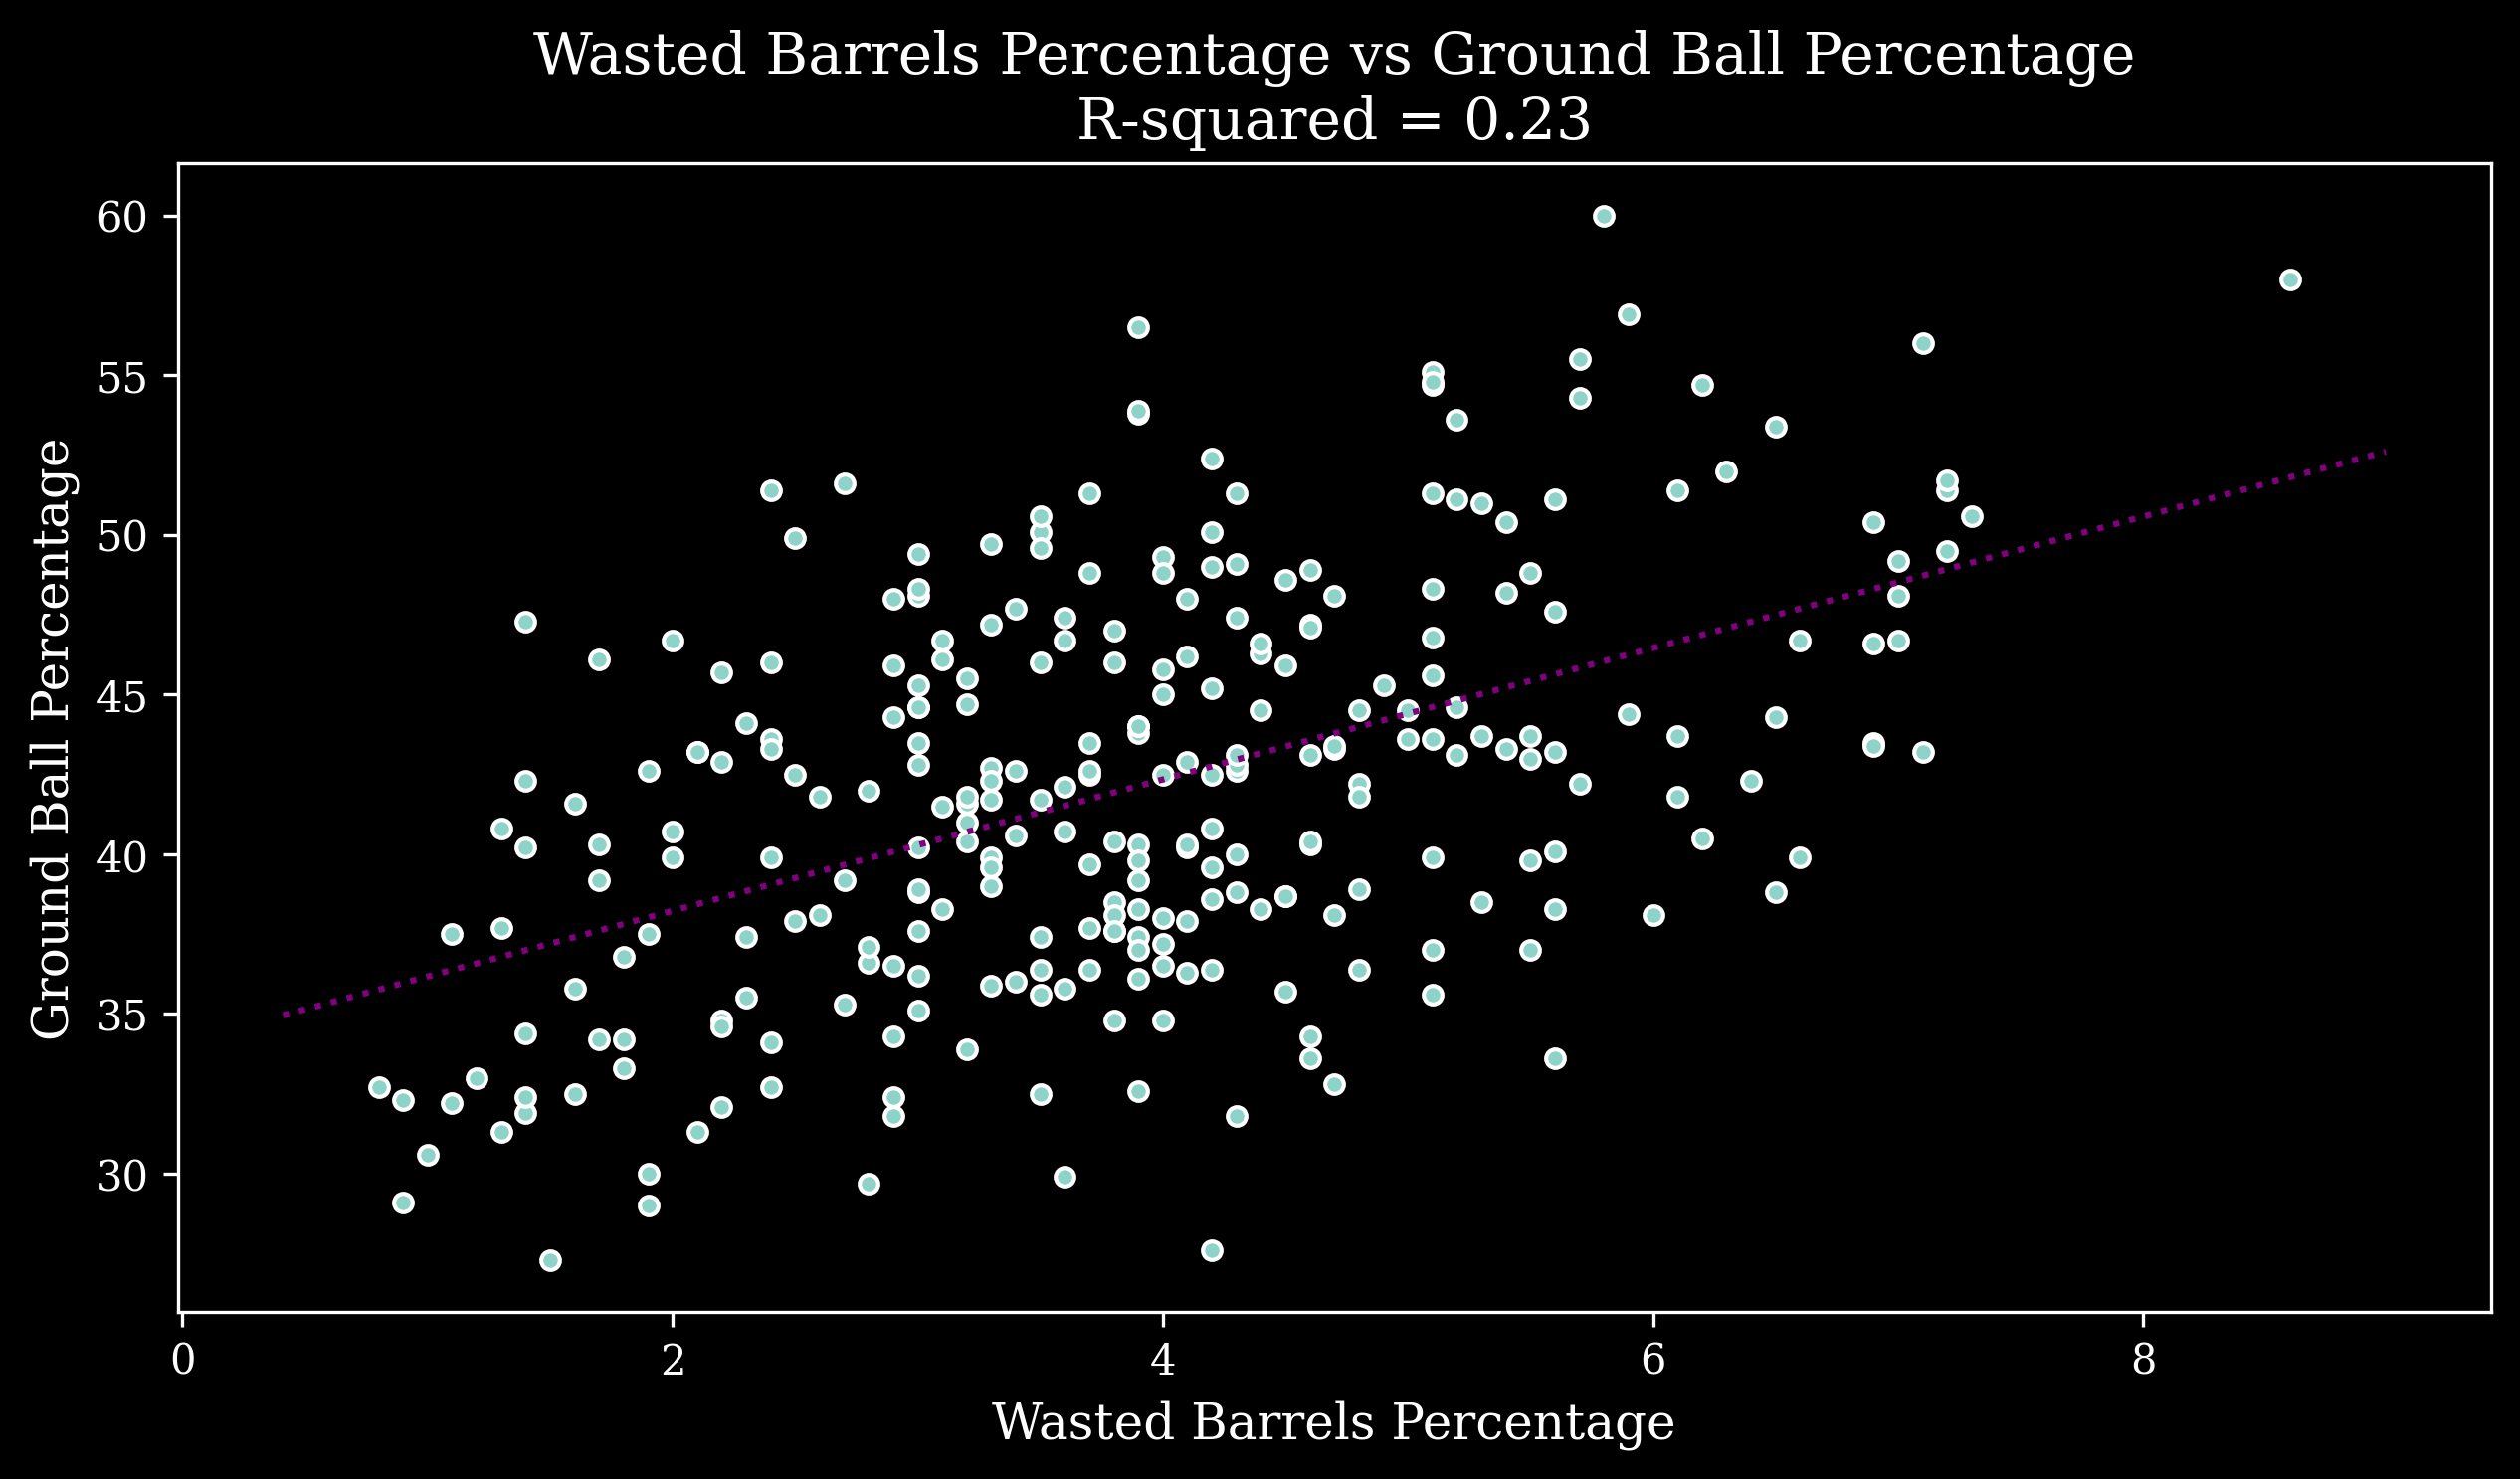

In [104]:
import statsmodels.api as sm

# Create a scatter plot of out percentage for 2022 vs 2023
plt.scatter(wasted_barrels_per_player_gb_joined['wasted_barrels_pct'], wasted_barrels_per_player_gb_joined['GB%'], edgecolor='white', s=20)

# Calculate the R-squared value
X = sm.add_constant(wasted_barrels_per_player_gb_joined['wasted_barrels_pct'])
Y = wasted_barrels_per_player_gb_joined['GB%']
model = sm.OLS(Y.astype(float), X.astype(float)).fit()
r_squared = model.rsquared

# Add the regression line to the plot
x_vals = np.array(plt.xlim())
y_vals = model.params[0] + model.params[1] * x_vals
plt.plot(x_vals, y_vals, color='purple', linestyle=':')

# Remove the grid lines from the plot
plt.grid(False)

# Show the R-squared value in the plot title
plt.title(f'Wasted Barrels Percentage vs Ground Ball Percentage\nR-squared = {r_squared:.2f}', fontsize=14)

# Add labels to the x and y axes
plt.xlabel('Wasted Barrels Percentage', fontsize=12)
plt.ylabel('Ground Ball Percentage', fontsize=12)

# save the plot dpi=300
# plt.savefig('Projects/Vizis/WBpctvsGBpct.png', dpi=300)
plt.show()

In [105]:
#check BBE count to see if the qualifed numbers make sense
wasted_barrels_per_player['total_bbe_count'].describe()

count         284.0
mean     300.806338
std       82.751583
min           176.0
25%           232.0
50%           290.0
75%           359.5
max           798.0
Name: total_bbe_count, dtype: Float64

In [106]:
#use the plottable package to make the table look nice
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image

#add a column called logo which is the batter_team column with the logos path
wasted_barrels_per_player['logo'] = wasted_barrels_per_player['batter_team'].apply(lambda x: f"C:/Users/bhamm/OneDrive/Documents/Projects/Logos/{x.lower()}_logo.png")


#filter to only batter_team is (change this line to change the data inside the table)
year = 2024

#uncomment here for a specific team
team = 'STL'
wasted_barrels_per_player=wasted_barrels_per_player[wasted_barrels_per_player['batter_team']==team]

#make wasted_barrels_per_player just the top 10 players with the highest wasted_barrels_pct
wasted_barrels_per_player = wasted_barrels_per_player.head(10)

#show the top 10 players with the most wasted barrels
wasted_barrels_per_player= wasted_barrels_per_player[[
    'batter_name',
    'logo',
    'wasted_barrels_pct']]

#change column names in wasted_barrels_per_player to Batter, Team, WastedBarrels
wasted_barrels_per_player.columns = [
    'Batter',
    'Team',
    'WastedBarrels%'
]

In [110]:
bg_color="#FFFFFF"
text_color="#000000"

col_defs=[
    ColumnDefinition(
        name="Batter",
        textprops={"ha":"center","color":text_color,"weight":"bold"},
        width=0.3
    ),
    ColumnDefinition(
        name="Team",
        textprops={"ha":"center","va":"center","color":text_color},
        width=0.1,
        plot_fn=image
    ),
    ColumnDefinition(
        name="WastedBarrels%",
        group="BBE in Own 90th% EV and < 8 or > 40 LA",
        textprops={"ha":"center","color":text_color,"bbox":{"boxstyle":"circle","pad":1.5,"facecolor":'red'}},
        width=0.5,
        #cmap=normed_cmap(wasted_barrels_per_player['WastedBarrels%'],cmap=plt.cm.RdYlGn_r,num_stds=2)
    )
]

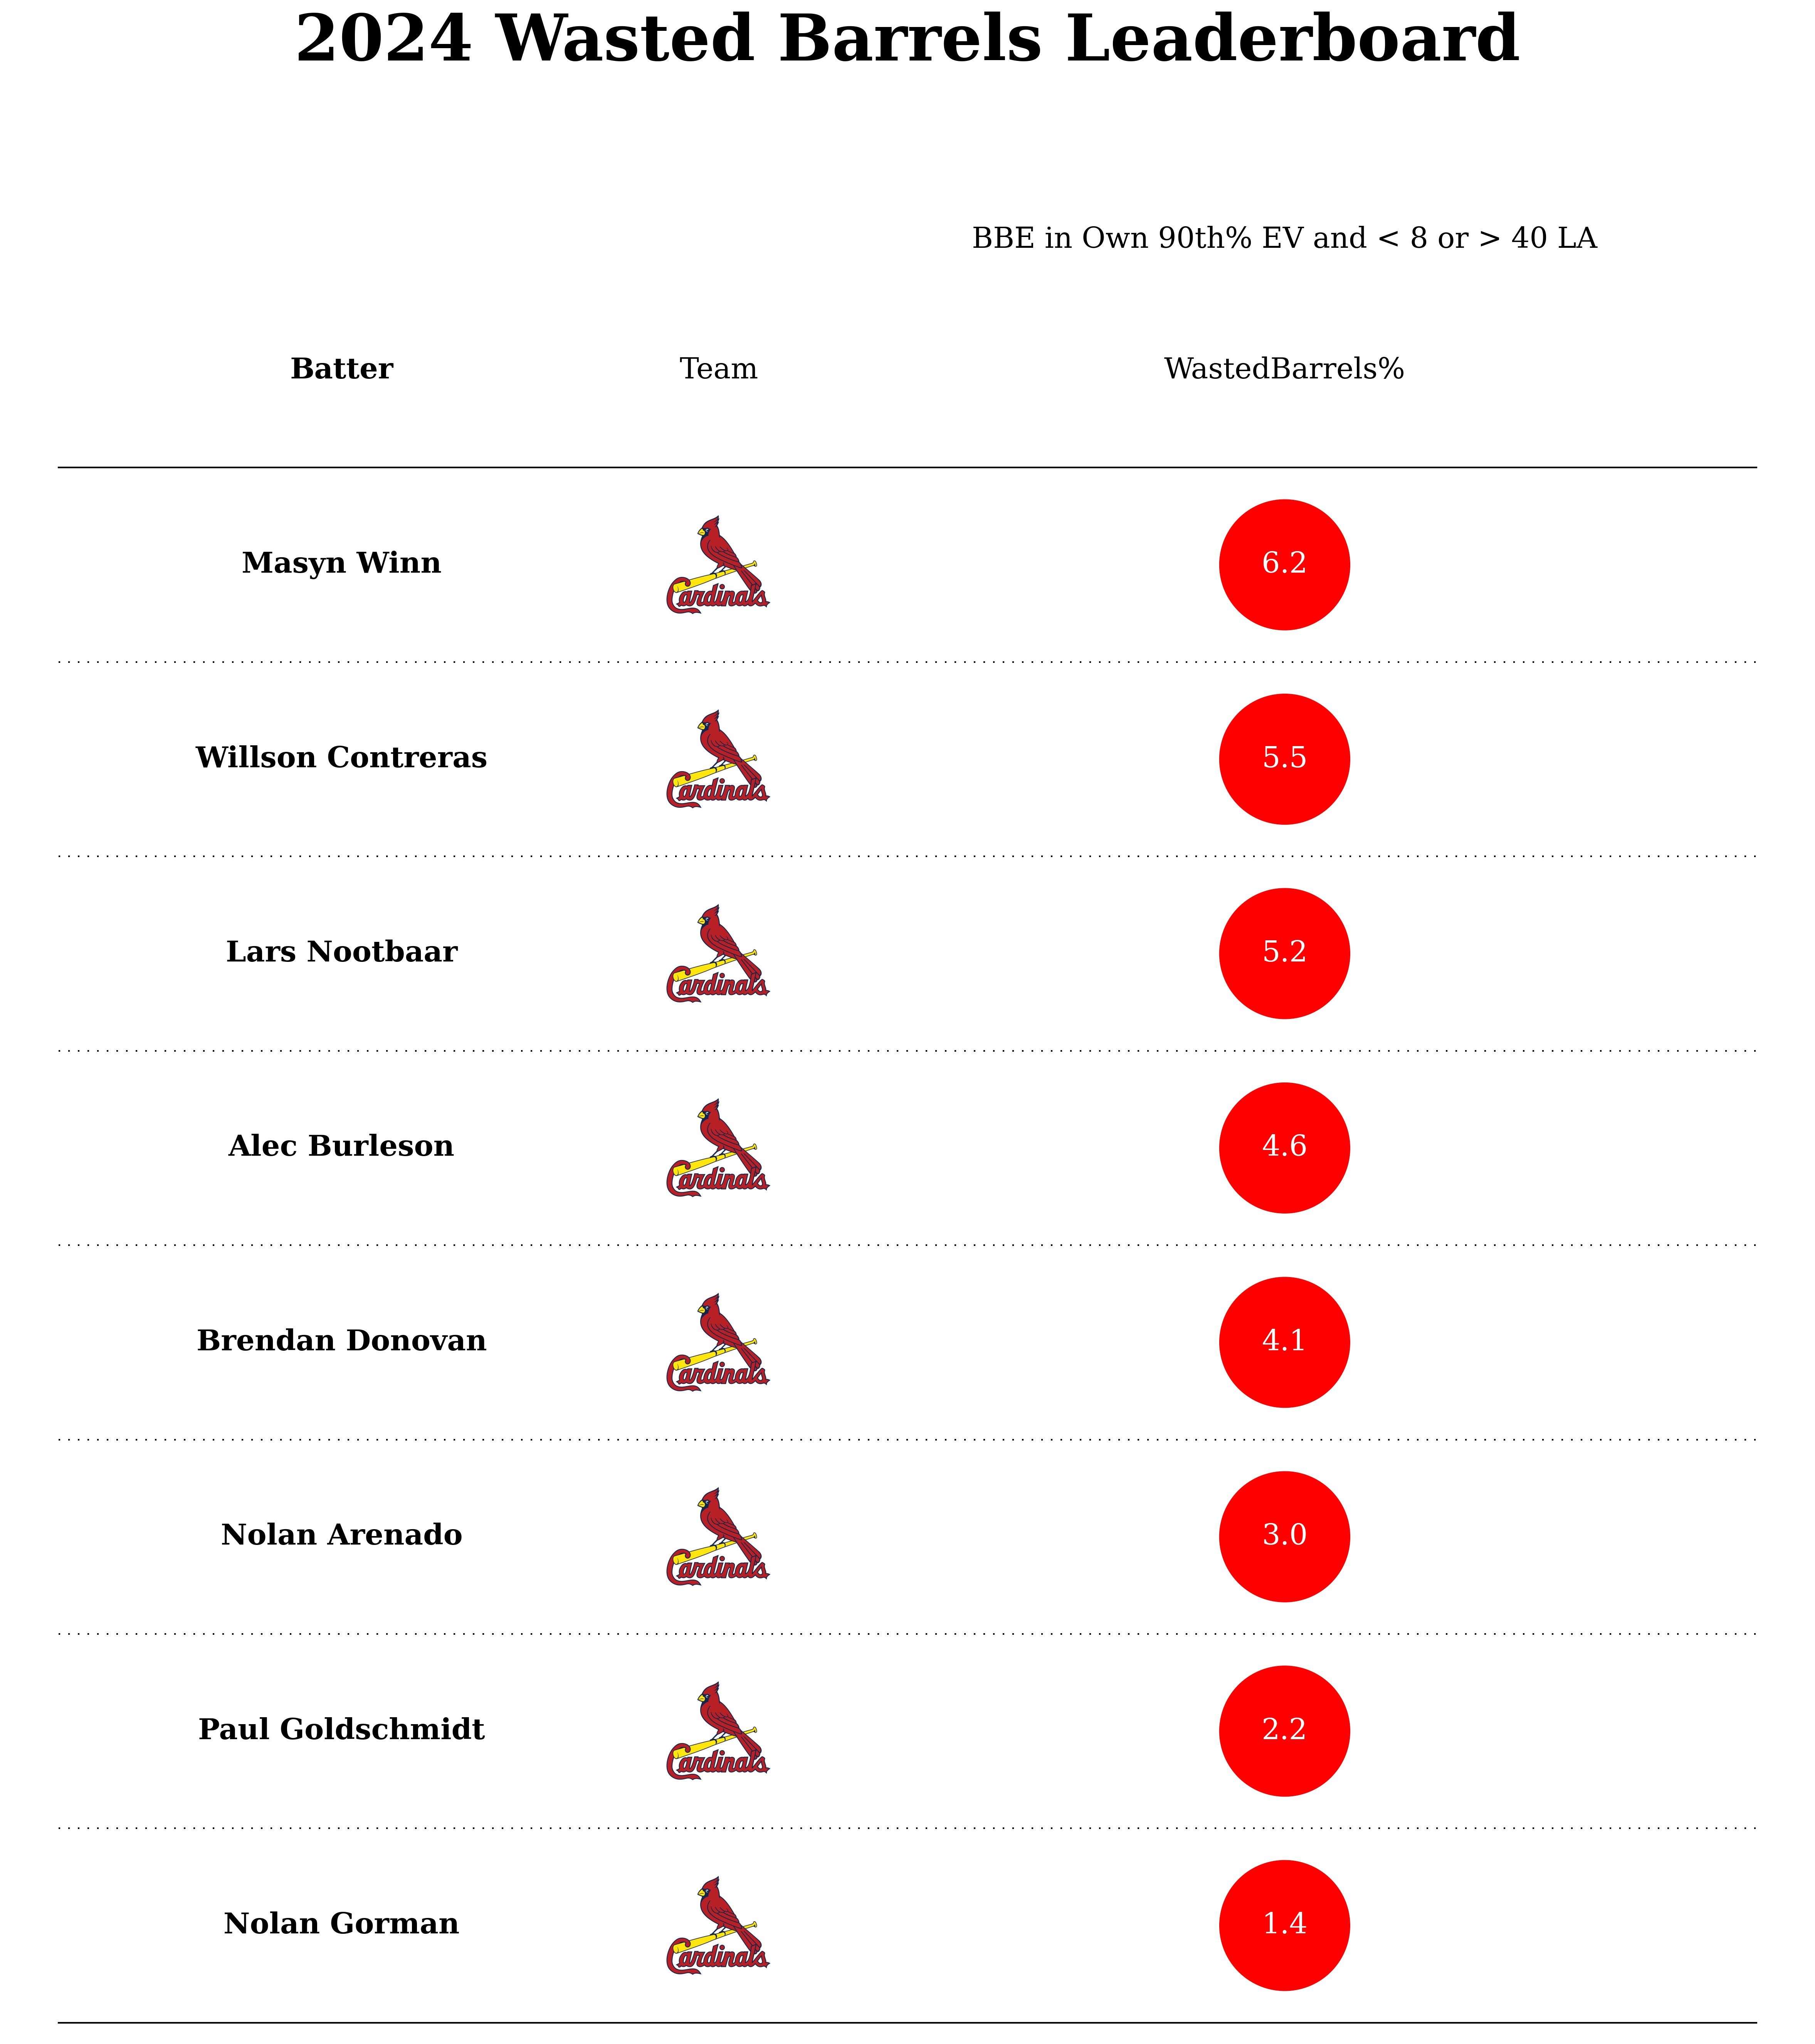

In [111]:
fig, ax = plt.subplots(figsize=(20, 22))
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)
ax.set_title(f"{year} Wasted Barrels Leaderboard", fontsize=40, color=text_color, fontweight="bold")
table = Table(
    wasted_barrels_per_player,
    column_definitions=col_defs,
    row_dividers=True,
    footer_divider=True,
    col_label_divider=True,
    index_col="Batter",
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5)),"color":text_color},
    textprops={"fontsize":18,"color":text_color},
    col_label_divider_kw={"linewidth":1,"linestyle":"-", "color":text_color},
    column_border_kw={"linewidth":.5,"linestyle":"-", "color":text_color,},
    footer_divider_kw={"linewidth":1,"linestyle":"-", "color":text_color},
    ax=ax

).autoset_fontcolors(colnames=["WastedBarrels%"])

fig.show()

In [112]:
fig.savefig(
    f"C:/Users/bhamm/OneDrive/Documents/Projects/Vizis/{year}WastedBarrels_table{year}.png",
    facecolor=ax.get_facecolor(),
    dpi=200,
    bbox_inches="tight",
)